In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [2]:
# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
NUM_EPOCHS = 50
LEARNING_RATE = 0.001

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow_from_directory('D:/College/Kodeshetra/train', target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('D:/College/Kodeshetra/val', target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode='binary')

Found 791 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [3]:
# Define model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(34, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)), #For a given window of ksize , takes the maximum value within that window. Used for reducing computation and preventing overfitting.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
]
)

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=val_generator)

# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('D:/College/Kodeshetra/test', target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


Epoch 1/50
25/25 [==============================] - 42s 2s/step - loss: 0.7311 - accuracy: 0.5107 - val_loss: 0.6906 - val_accuracy: 0.5306
Epoch 2/50
25/25 [==============================] - 36s 1s/step - loss: 0.6912 - accuracy: 0.5209 - val_loss: 0.6897 - val_accuracy: 0.5306
Epoch 3/50
25/25 [==============================] - 39s 2s/step - loss: 0.6919 - accuracy: 0.5247 - val_loss: 0.6965 - val_accuracy: 0.4694
Epoch 4/50
25/25 [==============================] - 38s 2s/step - loss: 0.6931 - accuracy: 0.5234 - val_loss: 0.6921 - val_accuracy: 0.5306
Epoch 5/50
25/25 [==============================] - 37s 1s/step - loss: 0.6930 - accuracy: 0.5335 - val_loss: 0.6909 - val_accuracy: 0.5306
Epoch 6/50
25/25 [==============================] - 37s 1s/step - loss: 0.6923 - accuracy: 0.5335 - val_loss: 0.6916 - val_accuracy: 0.5306
Epoch 7/50
25/25 [==============================] - 33s 1s/step - loss: 0.6915 - accuracy: 0.5335 - val_loss: 0.6913 - val_accuracy: 0.5306
Epoch 8/50
25/25 [==

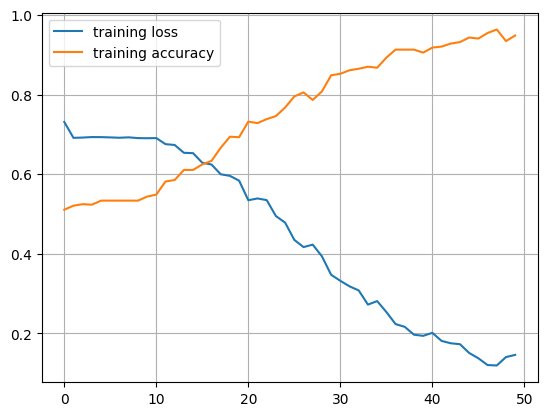

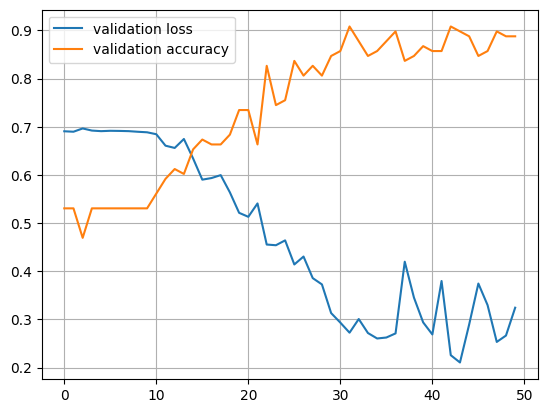

In [8]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()
plt.show()




plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Defining a function to run prediction through an image array
def predict_frame_class(frame, model):
    # Convert the frame to a tensor
    tensor = tf.keras.preprocessing.image.img_to_array(frame)
    tensor = tf.expand_dims(tensor, axis=0)

    # Preprocess the tensor
    tensor = tf.keras.applications.mobilenet_v2.preprocess_input(tensor)

    # Make a prediction
    prediction = model.predict(tensor)

    # Return the predicted class (0 or 1) 
    return int(prediction[0][0])


In [10]:
# Read in the video file
video_path = "D:/TestV.mp4"
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Set the desired frame size
frame_size = (224, 224)

# Loop over every 20th frame
for i in range(0, total_frames, 20):
    # Set the current frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)

    # Read the frame
    ret, frame = cap.read()

    # If the frame was successfully read
    if ret:
        # Resize the frame to the desired size
        frame = cv2.resize(frame, frame_size)

        # Run the frame through the model to get the predicted class
        predicted_class = predict_frame_class(frame, model)

        # Do something with the predicted class (e.g., print it out)
        print(predicted_class)

# Release the video capture object
cap.release()

1/1 [==============================] - 0s 144ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 30ms/step
0
1/1 [==============================] - 0s 30ms/step
0
1/1 [==============================] - 0s 38ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 27ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 33ms/step
0
1/1 [==============================] - 0s 32ms/step
0
1/1 [==============================] - 0s 27ms/step
0
1/1 [==============================] - 0s 31ms/step
0
1/1 [==============================] - 0s 26ms/step
0
1/1 [==============================] - 0s 24ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 29ms/step
0
1/1 [======================